# Deep Learning - 2019 Class - NIA


This Notebook introduces Deep Learning Methods implemented in R.

Load Libraries and Hyperparameters:

Keras - high-level neural networks API 
      "Being able to go from idea to result with the least possible delay is key to doing good research."

- Batch Size - number of observations trained on at a time
- Number of Classes - How many outputs can we have? 10 digits
- Epochs - The number of cycles of training

In [1]:
library(rlang)
library(tidyverse)
devtools::install_github("rstudio/keras")
library(keras)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%@%()         masks rlang::%@%()
✖ purrr::as_function() masks rlang::as_function()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks rlang::flatten()
✖ purrr::flatten_chr() masks rlang::flatten_chr()
✖ purrr::flatten_dbl() masks rlang::flatten_dbl()
✖ purrr::flatten_int() masks rlang::flatten_int()
✖ purrr::flatten_lgl() masks rlang::flatten_lgl()
✖ purrr::flatten_raw() masks rlang::flatten_raw()
✖ purrr::invoke()      mas

## Load Dataset
- Assign training and testing data:

In [2]:
use_python("/usr/local/bin/python3")

In [3]:
mnist <- dataset_mnist()

x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# Transform Data

* Observations: reshape
    * From 2D array to 1D vector for each observation

In [4]:
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

In [5]:
# rescale
  # Empirically shown to improve Deep Learning Performance

x_train <- x_train / 255
x_test <- x_test / 255

# Outcomes:
  # One-hot encode numeric to categorical outcome
  # (i.e. convert outcome to 0 and 1)

y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)



Define the Model Parameters:


In [6]:
# Sequentially stack layers:
model <- keras_model_sequential() 

# Add layers:
  # Dense layers: Fully connected to previous and forward layers
  # Dropout: Ratio of nodes to hide each iteration
  # Activation: Type of non-linear relation function of input to output of node
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     200960      
________________________________________________________________________________
dropout (Dropout)                   (None, 256)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________

# Compile the Model

In [7]:
# Loss: Term to assess accuracy. Needs to be minimized
# Optimizer: Function to shift weights in backpropogation

model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_rmsprop(),
  metrics = c('accuracy')
)

# Train the Model

In [8]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 20, batch_size = 128, 
  validation_split = 0.2
)

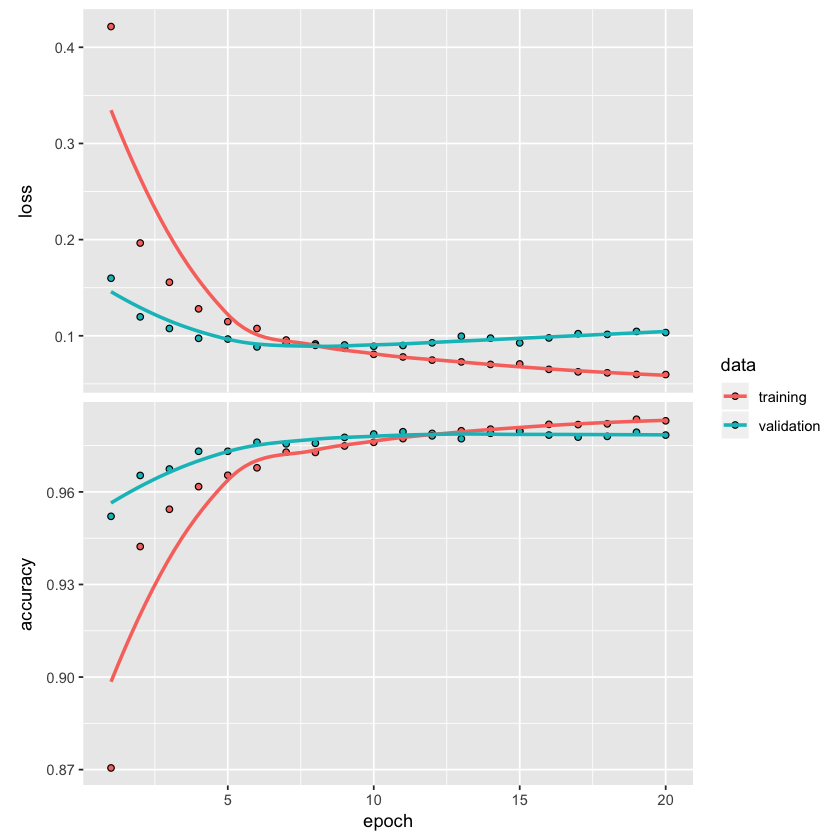

In [10]:
plot(history)

In [11]:
model %>% evaluate( x_test, y_test )

$loss
[1] 0.094945

$accuracy
[1] 0.9798

In [ ]:
model %>% predict_classes(x_test) %>% head